# Introduction

* Aim of this notebook is to run a good EDA on fMNIST dataset, train a neural network using Tensorflow.

# Obtaining the Data

## Load the dataset & required libraries

In [359]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
df_training = pd.read_csv('data/fashion-mnist_train.csv')
df_testing = pd.read_csv('data/fashion-mnist_test.csv')

## Understand the dataset deeply

In [360]:
df_training.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Each row is a separate image
* Column 1 is the class label.
* Remaining columns are pixel numbers (784 total).
* Each value is the darkness of the pixel (1 to 255)

In [361]:
# unique labels
labels = sorted(df_training.label.unique().tolist())
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

**Each training and test example is assigned to one of the following labels:**

| Label | Category    |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |




# Data Preprocessing

## Numpy array & Split Data 

In [362]:
# Conveting to numpy arrays

df_train = df_training.to_numpy()
df_test = df_testing.to_numpy()

# Split the data into features and labels

train_labels  = df_train[:,0]
train_features = df_train[:,1:]
test_labels  = df_test[:,0]
test_features = df_test[:,1:]

print(f'Image DType: {type(train_features)}')
print(f'Image Element DType: {type(train_features[0,0])}')
print(f'Label Element DType: {type(train_labels[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {train_features.shape}')
print(f'Labels: {train_labels.shape}')
print('Test Data:')  
print(f'Images: {test_features.shape}')
print(f'Labels: {test_labels.shape}')
print('Image Data Range:')
print(f'Min: {train_features.min()}')
print(f'Max: {train_features.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.int64'>
Label Element DType: <class 'numpy.int64'>
**Shapes:**
Train Data:
Images: (60000, 784)
Labels: (60000,)
Test Data:
Images: (10000, 784)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


## Reshaping & Normalizing the data

In [363]:
# reshping the data
train_images = train_features.reshape((60000, 28 * 28))  
test_images = test_features.reshape((10000, 28 * 28))

# Normalize the data
train_images = train_images.astype("float32") / 255  
test_images = test_images.astype("float32") / 255

In [364]:
# Display the min, max, and shape of the training images

print(train_images.min())
print(train_images.max())
print(train_images.shape)
print(train_images[0].shape)

0.0
1.0
(60000, 784)
(784,)


# Exploratory Data Analysis

## First 10 Images 

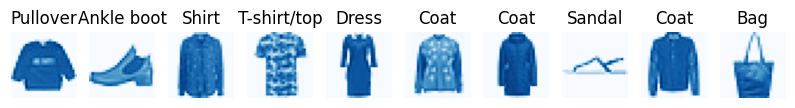

In [365]:
label_vis = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
fig, axes = plt.subplots(1, 10, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i].reshape(28, 28), cmap='Blues')
    ax.set_title(label_vis[train_labels[i]])
    ax.axis('off')
plt.show()

* Visualization shows the first 10 images with their labels from the training set. Each image is a 28x28 grayscale representation of a fashion item, such as a shoe, bag, or piece of clothing.

## Understanding the class distribution : Frequency 

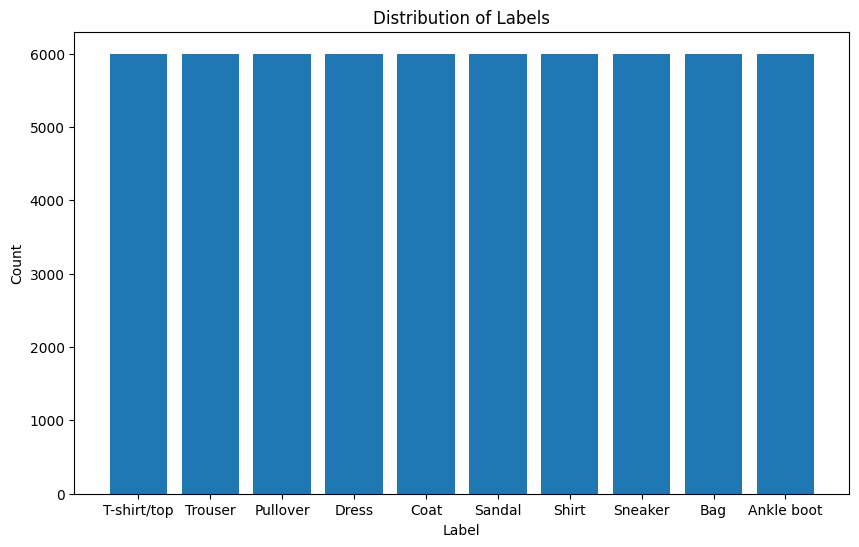

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64)

In [366]:
labels, counts = np.unique(df_training['label'], return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(labels, counts)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(labels, label_vis)  
plt.show()
display(labels,counts)

* Visualization displays the distribution of labels in the training set. The distribution is relatively uniform, indicating a balanced dataset which is beneficial for training a model.

# Creating the Model

In [367]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model

In [368]:
model.compile(optimizer="rmsprop",  
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train the model

In [369]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.5641 - accuracy: 0.7990
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3910 - accuracy: 0.8582
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3455 - accuracy: 0.8738
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3184 - accuracy: 0.8825
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2990 - accuracy: 0.8892


# Model Evaluation with validation set

## Accuracy

In [370]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
                            train_images, train_labels, 
                            test_size=0.2, random_state=0)

# Make predictions
y_pred_probs = model.predict(x_val)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
print(y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy of the model is {accuracy:.3f}')

375/375 [==============================] - 0s 1ms/step
[1 6 8 ... 6 9 3]
Accuracy of the model is 0.896


* Accuracy of the model is .896.
* Accuracy of .896 means the model predictions are correct. That is approximately 89.6 % of the images in validation set is predicted correctly.

## Precison,Recall & F1 Score for each class

In [371]:
from sklearn.metrics import precision_score, recall_score, f1_score

my_class = np.unique(y_train)
prec = []
recall = []
f1= []
for i in my_class:
    # Filter predictions and  labels for the current class
    y_cls_pred = (y_pred == i)
    y_cls_true = (y_val == i)
    
    # Calculate precision, recall, and F1-score for the current class
    precision_i = precision_score(y_cls_true, y_cls_pred)
    recall_i = recall_score(y_cls_true, y_cls_pred)
    f1_i = f1_score(y_cls_true, y_cls_pred)

    # appending values to list

    prec.append(precision_i)
    recall.append(recall_i)
    f1.append(f1_i)
results = {'Class': my_class, 'Precision': prec, 'Recall': recall, 'F1-score': f1}
df_results = pd.DataFrame(results)
df_results

,Class,Precision,Recall,F1-score
0,0,0.889410,0.798150,0.841312
1,1,0.991525,0.984020,0.987759
2,2,0.784314,0.863787,0.822134
3,3,0.880652,0.942857,0.910694
4,4,0.875129,0.701987,0.779054
5,5,0.976763,0.990741,0.983702
6,6,0.688549,0.789958,0.735776
7,7,0.951654,0.967241,0.959384
8,8,0.988255,0.973554,0.980849
9,9,0.982788,0.954052,0.968207


* This table shows the  model is performaing well.
* Class 1,5,7,8,9 has high precison,recall,f1.
* This means the model is predicting correctly for theese classes than others.
* Class 6 has the lowest precison & f1 score.

## Run on Test Set & Conclusions

In [372]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Set Accuracy is : {test_acc:.3f}")

313/313 [==============================] - 0s 1ms/step - loss: 0.3186 - accuracy: 0.8844
Test Set Accuracy is : 0.884


* Model shows a good accuracy in test data as well with a value of .884.
* This means 88.4 % of the images in test dataset are predicting correctly.

# Increase the Precison for class '5'

* To increase the precision for class '5', adjust the classification threshold for this class.
* I am keeping high threshold value for class 5.
* This will help to reduce the false positives.

In [373]:
# Predict probabilities for the test set
class5_prob = model.predict(test_images)

# higher threshold for class '5'
threshold = 0.9 

# Apply the new threshold for class '5'
y_pred_adjusted = np.array([5 if prob[5] >= threshold else np.argmax(prob) for prob in class5_prob])

precision = precision_score(test_labels, y_pred_adjusted, labels=[5], average='micro')
print(f'Adjusted Precision for class 5: {precision}')

313/313 [==============================] - 0s 1ms/step
Adjusted Precision for class 5: 0.9627391742195368


# Increase the Recall for class '5'

* To increase the recall for class '5' without changing the model or retraining, we have to adjust the prediction threshold. 
* By decreasing the threshold, make the criteria for predicting class '5' less stringent, which can increase recall at the cost of precision.

In [374]:
# lower threshold for class '5'
threshold = 0.01  

# Apply the new threshold for class '5'
y_pred_adjusted = np.array([5 if prob[5] >= threshold else np.argmax(prob) for prob in class5_prob])

from sklearn.metrics import recall_score
recall = recall_score(test_labels, y_pred_adjusted, labels=[5], average='micro')
print(f'Adjusted Recall for class 5: {recall}')

Adjusted Recall for class 5: 0.992
